<div style="background-color:#282423; text-align:center; vertical-align: middle; padding:10px 40px;">
    <div align="left" style="font-size:1em; color:#8c8c8c;font-family:didot;">Pérdidas de carga en flujos internos</div>
<!-- 1em son 16px -->
    <div align="right" style="font-size:1em; color:#8c8c8c;font-family:didot;" >Bloque 5</div>
    <br/>
    <br/>
    <br/>
    <h1 style="margin: 10px;color:white;font-family:didot;">FLUJO PERMANENTE EN CONDUCTOS CERRADOS</h1>
    <hr>
     <h1 style="margin: 10px;color:white;font-family:didot;">PÉRDIDAS MENORES</h1>
    <h1 style="margin: 10px;color:#BFAE5F;font-family:didot;"><em>~ Factores de paso ~</em></h1>
    <br/>

</div>
<br/>
<div style="background-color:#EAEAE9;padding:10px 40px;text-align:center; vertical-align: middle;font-family:didot;">
    <h1><b style="font-size: 17px;">Ejercicio 6.21 de la colección de problemas</b></h1>
    <hr>
<p style="font-size: 15px;text-align: justify;">Se tiene una instalación de llenado de camiones de reparto de keroseno a partir de un depósito de almacenamiento, mediante el sistema de tuberías indicado en la figura. Se pide:</p>
    
<p style="font-size: 15px;"> a) Caudal circulante en la posición de la figura. </p><br>

<p style="font-size: 15px;"> <b>Datos: </b><br>
- Temperatura del keroseno= 20 ºC <br>
- Peso específico relativo del keroseno= 0,77 <br>
- Longitud de la tubería= 25 m <br>
- Diámetro= 100 mm <br>
- Tubería de acero comercial. </p><br>
   
<img src="../../img/ejercicio_6.21.png" style="height:300px">
<br>
    
<p style="font-size: 15px;text-align: justify;"> <b>Nota:</b> Se ha de utilizar el método de los factores de paso para calcular la pérdida de carga de las piezas especiales. Solo se tendrán en cuenta las piezas especiales resaltadas.</p>
    <br>
</div>

<div style="background-color:#EAEAE9;padding:10px 40px;text-align:center; vertical-align: middle;font-family:didot;">
    <h1><b style="font-size: 18px;">Resolución del problema</b></h1>
<br>
<hr>  

<p style="font-size: 15px;text-align: justify;">
Del ábaco nº5 se obtiene la viscosidad cinemática característica del fluido.
<br>
Del cuadro de rugosidades nº20 se obtiene la rugosidad de la tubería.
</p>
</div>

In [1]:
#Antes que nada, se deben importar los módulos necesarios para usarlos al resolver los problemas. 
#Son unos ficheros que guardan definiciones y declaraciones de Python.

from math import pi, sqrt, log10
from ipynb.fs.full.abaco_de_moody import abaco_de_moody, abaco_de_moody_sin_texto
from ipywidgets import widgets, interactive
from ipynb.fs.full.funciones_variables import D, L, z_a, z_b, P_A, P_B, s, v_a, K_borda, K_valvula_compuerta, K_valvula_esferica, K_codos_radio_medio, rugosidad

#Crea una lista de los módulos instalados --> help("modules")
#Esta función crea una lista de las funciones o variables del módulo --> dir(math)

In [2]:
#Solicitar datos de entrada

print("Ingresa el diámetro de la tubería [m]: ")
D= interactive(D, D=widgets.FloatText(min=-10, max=100, step=0.1, value=0));
display(D)

print("Ingresa la longitud de la tubería: [m] ")
L= interactive(L, L=widgets.FloatText(min=-10, max=1000, step=1, value=0));
display(L)

print("Ingresa la cota de A: ")
z_a= interactive(z_a, z_a=widgets.FloatText(min=-50, max=1000, step=1, value=0));
display(z_a)

print("Ingresa la cota de B: ")
z_b= interactive(z_b, z_b=widgets.FloatText(min=-50, max=1000, step=1, value=0));
display(z_b)

print("Ingresa la presión de A [m.c.l.]: ")
P_A= interactive(P_A, P_A=widgets.FloatText(min=-50, max=1000, step=1, value=0));
display(P_A)

print("Ingresa la presión de B [m.c.l.]: ")
P_B= interactive(P_B, P_B=widgets.FloatText(min=-50, max=1000, step=1, value=0));
display(P_B)

print("Ingresa la densidad relativa del fluido: ")
s= interactive(s, s=widgets.FloatText(min=-10, max=100, step=0.01, value=0));
display(s)

print("Ingresa la velocidad A [m/s]: ")
v_a= interactive(v_a, v_a=widgets.FloatText(min=-50, max=100, step=0.1, value=0));
display(v_a)


#Solicitar factores de paso (cuadro nº24)

print("Ingresa el factor de paso del orificio borda: ")
K_borda= interactive(K_borda, K_borda=widgets.FloatText(min=-10, max=100, step=0.01, value=0));
display(K_borda)

print("Ingresa el factor de paso de la válvula de compuerta abierta: ")
K_valvula_compuerta= interactive(K_valvula_compuerta, K_valvula_compuerta=widgets.FloatText(min=-10, max=100, step=0.01, value=0));
display(K_valvula_compuerta)

print("Ingresa el factor de paso de la válvula esférica: ")
K_valvula_esferica= interactive(K_valvula_esferica, K_valvula_esferica=widgets.FloatText(min=-10, max=100, step=0.01, value=0));
display(K_valvula_esferica)

print("Ingresa el factor de paso de los codos comerciales de radio medio: ")
K_codos_radio_medio= interactive(K_codos_radio_medio, K_codos_radio_medio=widgets.FloatText(min=-10, max=100, step=0.01, value=0));
display(K_codos_radio_medio)

print("Ingresa la rugosidad de la tubería [cm]: ")

rugosidad= interactive(rugosidad, rugosidad=widgets.Dropdown(
    options=[('Acero roblonado', 0.18), 
             ('Hormigón', 0.12), 
             ('Hierro fundido (Fundición)', 0.026), 
             ('Madera', 0.06), 
             ('Hierro galvanizado', 0.015), 
             ('Fundición asfaltada', 0.012), 
             ('Acero comercial y soldado', 0.006), 
             ('Hierro forjado', 0.006), 
             ('Tubo estirado', 0.00024), 
             ('Latón y cobre', 0.00015), 
             ('Fibrocemento', 0.01), 
             ('PVC y PE', 0.0007)],
    description='Tubería:',
));
display(rugosidad)

#Constantes

g=9.8

Ingresa el diámetro de la tubería [m]: 


interactive(children=(FloatText(value=0.0, description='D', step=0.1), Output()), _dom_classes=('widget-intera…

Ingresa la longitud de la tubería: [m] 


interactive(children=(FloatText(value=0.0, description='L', step=1.0), Output()), _dom_classes=('widget-intera…

Ingresa la cota de A: 


interactive(children=(FloatText(value=0.0, description='z_a', step=1.0), Output()), _dom_classes=('widget-inte…

Ingresa la cota de B: 


interactive(children=(FloatText(value=0.0, description='z_b', step=1.0), Output()), _dom_classes=('widget-inte…

Ingresa la presión de A [m.c.l.]: 


interactive(children=(FloatText(value=0.0, description='P_A', step=1.0), Output()), _dom_classes=('widget-inte…

Ingresa la presión de B [m.c.l.]: 


interactive(children=(FloatText(value=0.0, description='P_B', step=1.0), Output()), _dom_classes=('widget-inte…

Ingresa la densidad relativa del fluido: 


interactive(children=(FloatText(value=0.0, description='s', step=0.01), Output()), _dom_classes=('widget-inter…

Ingresa la velocidad A [m/s]: 


interactive(children=(FloatText(value=0.0, description='v_a', step=0.1), Output()), _dom_classes=('widget-inte…

Ingresa el factor de paso del orificio borda: 


interactive(children=(FloatText(value=0.0, description='K_borda', step=0.01), Output()), _dom_classes=('widget…

Ingresa el factor de paso de la válvula de compuerta abierta: 


interactive(children=(FloatText(value=0.0, description='K_valvula_compuerta', step=0.01), Output()), _dom_clas…

Ingresa el factor de paso de la válvula esférica: 


interactive(children=(FloatText(value=0.0, description='K_valvula_esferica', step=0.01), Output()), _dom_class…

Ingresa el factor de paso de los codos comerciales de radio medio: 


interactive(children=(FloatText(value=0.0, description='K_codos_radio_medio', step=0.01), Output()), _dom_clas…

Ingresa la rugosidad de la tubería [cm]: 


interactive(children=(Dropdown(description='Tubería:', options=(('Acero roblonado', 0.18), ('Hormigón', 0.12),…

<div style="background-color:#EAEAE9;padding:10px 40px;text-align:center; vertical-align: middle;font-family:didot;">

<p style="font-size: 15px;text-align: justify;">Se aplica la ecuación de Bernoulli entre A y B: </p>

<p style="font-size: 15px;text-align: justify;">
\begin{equation}
v_{_{B}}=v  \\
    B_{_{A}} - h_{f_{tubería}} - h_{f_{p.e.}}= B_{_{B}} \rightarrow \frac{P_{_{A}}}{\gamma} + z_{_{A}} + \frac{{v_{_A}}^{^2}}{2 \cdot g} - f \cdot \frac{L}{D} \cdot \frac{{v}^{^2}}{2 \cdot g} - \sum \left( K \cdot \frac{{v}^{^2}}{2 \cdot g}\right)= \frac{P_{_{B}}}{\gamma} + z_{_{B}} + \frac{{v_{_{B}}}^{^2}}{2 \cdot g}
\end{equation}  
<br>
</p>
    
<p style="font-size: 15px;text-align: justify;">Sustituyendo los datos se obtiene una ecuación con dos incógnitas: v y f, donde no se tiene datos para entrar en el ábaco de Moody o las expresiones para conocer f y calcular v. Por ello, hay que recurrir a la iteración. </p>
</div>

In [3]:
#Suma de los factores de paso

k=K_borda.result + K_valvula_compuerta.result + K_valvula_esferica.result + (3*K_codos_radio_medio.result)

In [4]:
#El módulo tiene sólo una función, tabulate()
#imprime tablas a partir de los datos de entrada de su primer argumento
from tabulate import tabulate

#Pedimos al usuario que ingrese la viscosidad cinemática del fluido.

viscosidad_cinematica= float(input("Ingresa la viscosidad cinemática característica del fluido [m2/s]: "))

#Iteración

print("\n"+"Procedemos a iterar:"+"\n")

#Una vez el usuario ingrese la rugosidad, se calcula la rugosidad relativa que servirá para obtener el coeficiente de fricción f.

rugosidad_relativa= rugosidad.result/(D.result*100)

i=0
f= float(input("Ingresa el valor de f: "))
print()

#abs()--> valor absoluto
#tablefmt='fancy_grid'--> formato de la tabla, cuadriculada
#stralign='center' --> alineación en el centro

while i<9: 
    
    v= sqrt((z_a.result+P_A.result+((v_a.result**2)/(2*g))-z_b.result-P_B.result)/(((L.result*f)/(D.result*2*g))+(1/(2*g))+k))

    print("Con un valor de f de", f,"se obtiene un valor de v de", v, "m/s")
    print()
    
    #Se calcula Reynolds
    
    Re= (v*D.result)/viscosidad_cinematica
    
    #Ábaco de Moody. Se obtiene el coeficiente de fricción f.
    
    moody_f= abaco_de_moody(Re, rugosidad_relativa)
    
    #error en %
    error= abs(((f-moody_f)*100)/f)
    
    #Dependiendo del error se finaliza la iteración
    if error>0.00001:
        iguales=("NO")
        
        #Formato de la tabla
        iteracion= [['f', 'v', 'Re','ε/D', "Moody f'", "f=f'"],
                    [f, v, Re, rugosidad_relativa, moody_f, iguales]]
        i=i+1
        f=moody_f
        
        print()
        #Se imprime la tabla
        print(tabulate(iteracion, headers='firstrow', tablefmt='fancy_grid',stralign='center',numalign='center')) 
        print()
        print("Error:", error, '% > 0.00001%')
        print("Se han realizado",i, "iteraciones"+'\n')
        print()
        print("-------")
        print()
    else: 
        iguales=("SI")
        
        #Formato de la tabla
        iteracion= [['f', 'v', 'Re','ε/D', "Moody f'", "f=f'"],
                    [f, v, Re, rugosidad_relativa, moody_f, iguales]]
        f=moody_f
        i=i+1
        
        print()
        #Se imprime la tabla
        print(tabulate(iteracion, headers='firstrow', tablefmt='fancy_grid',stralign='center',numalign='center'))
        print()
        print("Error:", error, '% < 0.00001%')
        print("Se han realizado",i, "iteraciones"+'\n')
        print()
        break
        
if (i==9) and (error>0.00001):
    
    v= sqrt((z_a.result+P_A.result+((v_a.result**2)/(2*g))-z_b.result-P_B.result)/(((L.result*f)/(D.result*2*g))+(1/(2*g))+k))

    print("Con un valor de f de", f,"se obtiene un valor de v de", v, "m/s")
    print()
    
    Re= (v*D.result)/viscosidad_cinematica
    
    moody_f= abaco_de_moody(Re, rugosidad_relativa)
                
    iguales=("SI")
    
    #Formato de la tabla
    iteracion= [['f', 'v', 'Re','ε/D', "Moody f'", "f=f'"],
            [f, v, Re, rugosidad_relativa, moody_f, iguales]]
    error= abs(((f-moody_f)*100)/f)
    f=moody_f
    i=i+1
    
    print()
    #Se imprime la tabla
    print(tabulate(iteracion, headers='firstrow', tablefmt='fancy_grid',stralign='center',numalign='center'))
    print()
    print("Error:", error, '% > 0.00001%')
    print("Se han realizado",i, "iteraciones"+'\n')
    print()

Ingresa la viscosidad cinemática característica del fluido [m2/s]: 0.0000022

Procedemos a iterar:

Ingresa el valor de f: 0.03

Con un valor de f de 0.03 se obtiene un valor de v de 1.009679565159376 m/s

Como Re>=4000 es un flujo turbulento y depende de la rugosidad de la tubería. Se trata de una tubería semirrugosa.
Según la expresión aproximada de PSAK se obtiene f= 0.023270293082176013

╒══════╤═════════╤═════════╤════════╤════════════╤════════╕
│  f   │    v    │   Re    │  ε/D   │  Moody f'  │  f=f'  │
╞══════╪═════════╪═════════╪════════╪════════════╪════════╡
│ 0.03 │ 1.00968 │ 45894.5 │ 0.0006 │ 0.0232703  │   NO   │
╘══════╧═════════╧═════════╧════════╧════════════╧════════╛

Error: 22.43235639274662 % > 0.00001%
Se han realizado 1 iteraciones


-------

Con un valor de f de 0.023270293082176013 se obtiene un valor de v de 1.0209085125850519 m/s

Como Re>=4000 es un flujo turbulento y depende de la rugosidad de la tubería. Se trata de una tubería semirrugosa.
Según la expres

In [5]:
#Calculamos el caudal circulante

A= ((pi)*D.result**2)/4
Q=A*v*1000

print("Con una velocidad de", v, "m/s se obtiene un caudal circulante de", Q, "l/s")

Con una velocidad de 1.02098098328935 m/s se obtiene un caudal circulante de 8.018765891391762 l/s


In [6]:
print("RESULTADO:", Q, "l/s")

RESULTADO: 8.018765891391762 l/s


<div style="background-color:#EAEAE9;padding:10px 40px;text-align:center; vertical-align: middle;font-family:didot;">

<p style="font-size: 15px;text-align: justify;">Representación gráfica del caudal circulante en función del sumatorio de los factores de paso.</p>

</div>

In [7]:
#Importar el módulo pyplot

import matplotlib.pyplot as plt

In [8]:
#Declaración de una lista vacía
factor_de_paso= []
caudal=[]


#For para rellenar una lista con un determinado número de elementos
for elemento in range(20):
    
    if elemento==0:
        k = k
    else:
        k= k + 0.1
        
    factor_paso_valor= k
    
    i=0
    f= 0.3

    while i<9: 
    
        v= sqrt((z_a.result+P_A.result+((v_a.result**2)/(2*g))-z_b.result-P_B.result)/(((L.result*f)/(D.result*2*g))+(1/(2*g))+k))
    
        #Se calcula Reynolds
    
        Re= (v*D.result)/viscosidad_cinematica
    
        #Ábaco de Moody. Se obtiene el coeficiente de fricción f.
    
        moody_f= abaco_de_moody_sin_texto(Re, rugosidad_relativa)
                    
        #error en %
        error= abs(((f-moody_f)*100)/f)
    
        #Dependiendo del error se finaliza la iteración
        if error>0.00001:
        
            i=i+1
            f=moody_f
        else: 
        
            f=moody_f
            i=i+1
            break 
        
    if (i==9) and (error>0.00001):
    
        v= sqrt((z_a.result+P_A.result+((v_a.result**2)/(2*g))-z_b.result-P_B.result)/(((L.result*f)/(D.result*2*g))+(1/(2*g))+k))

        Re= (v*D.result)/viscosidad_cinematica
    
        moody_f= abaco_de_moody_sin_texto(Re, rugosidad_relativa)
                    
        error= abs(((f-moody_f)*100)/f)
        f=moody_f
        i=i+1
    
    #Calculamos el caudal circulante

    A= ((pi)*D.result**2)/4
    Q=A*v*1000
    
    
    factor_de_paso.append(factor_paso_valor)
    
    caudal.append(Q)

print(caudal)
print()
print(factor_de_paso)

[8.018765913962472, 7.9156428308203175, 7.81641017509066, 7.720828992880419, 7.6286804023954735, 7.539763475704497, 7.453893387576045, 7.370899770342316, 7.290625378725719, 7.212924686540066, 7.137662873642829, 7.064714811871829, 6.9939641867927556, 6.92530271483436, 6.8586294438008775, 6.7938501264634255, 6.730876658372759, 6.669626572252204, 6.620641880906595, 6.56224092132301]

[3.49, 3.5900000000000003, 3.6900000000000004, 3.7900000000000005, 3.8900000000000006, 3.9900000000000007, 4.090000000000001, 4.19, 4.29, 4.39, 4.489999999999999, 4.589999999999999, 4.689999999999999, 4.789999999999998, 4.889999999999998, 4.9899999999999975, 5.089999999999997, 5.189999999999997, 5.2899999999999965, 5.389999999999996]


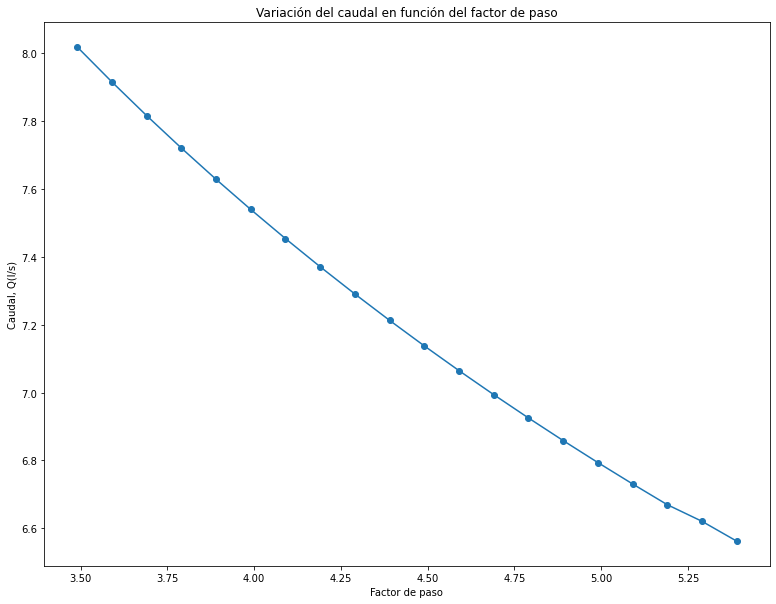

In [10]:
plt.plot(factor_de_paso, caudal, 'o-') #pinta 10 puntos como o y los une con una linea continua

#Personalización del gráfico
plt.xlabel("Factor de paso") #etiqueta horizontal, del eje x
plt.ylabel("Caudal, Q(l/s)") #etiqueta vertical, del eje y 
plt.title("Variación del caudal en función del factor de paso") #Título del gráfico
plt.rcParams['figure.figsize'] = [13, 10]  #tamaño del grafico en pulgadas, [width, height]


plt.show() #muestra el gráfico